# 📑 1. Carga y limpieza inicial
1. Importar librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2. Rutas y variables

In [2]:
R_Excel = r"C:\Users\osmarrincon\OneDrive - 891856000_CAPRESOCA E P S\Escritorio\Yesid Rincón Z\informes\2025\CTO135.2025 Informe  #6\ACTIVIDAD 14\Presatciones economicas\Limpia BASE UNICA PRESTACIONES ECONOMICAS.xlsx"
H_Incapacidades = "2023,2024,2025"

3. Leer el DataFrame

In [3]:
# 1.1 Lee la hoja de incapacidades del Excel
df_Incapacidades = pd.read_excel(R_Excel, sheet_name=H_Incapacidades, dtype=str)

4. Revisión rápida

In [4]:
num_registros, num_columnas = df_Incapacidades.shape
print(f"Número de registros: {num_registros}")
print(f"Número de columnas: {num_columnas}")

Número de registros: 4689
Número de columnas: 68


In [5]:
df_Incapacidades.columns   # nombres de las columnas

Index(['Consecutivo', 'Año de Radicado', 'Mes de Radicado',
       'Numero Consecutivo', 'Modo de Radicacion', 'Tipo_Doc_Empleador',
       'Numero de Documentos del empelador', 'Nombre de la Emprea',
       'Correo electronico ', 'Serial BDUA Cotizante', 'Tipo_Doc_Cotizante',
       'N_Doc_Cotizante', 'Nombre del Cotizante', 'Fecha Nacimiento',
       'Municipio', 'Tipo de Afiliado', 'Tipo de Cotizante',
       'Identificacion de la Incapacidad', 'Tipo de Incapacidad', 'CIE 10',
       'Covid', 'ACCIDENTE DE TRANSITO', 'ACCIDENTE LABORAL',
       'Detalle de la Incapacidad', 'Fecha de Inicio Incapacidad',
       'Fecha final Incapacidad', 'Dias con Prorroga ', 'Salario o IBC',
       'Fecha de Radicado', 'Estado de la Incapacidad', 'Fecha de pago',
       'Dias Incapacidad', 'Dias Reconocidos EPS', 'Dias Pagos Empleador',
       'Tipo de Pago', 'Valor de la Reserva', 'Valor Pagado',
       'Valor con Varios Pagos', 'Comprobante de Egreso',
       'Valor de Pagos Pendientes', 'Tipo Doc

In [6]:
df_Incapacidades.shape

(4689, 68)

In [7]:
df_Incapacidades.dtypes

Consecutivo                    object
Año de Radicado                object
Mes de Radicado                object
Numero Consecutivo             object
Modo de Radicacion             object
                                ...  
fecha solicitud CO             object
Fecha Notificacion DEL PAGO    object
enviado adres                  object
fecha de envio adres           object
REVISADO POR LA IPS            object
Length: 68, dtype: object

In [8]:
df_Incapacidades.isna().mean().sort_values(ascending=False)

REVISADO POR LA IPS            0.998081
fecha solicitud CO             0.968863
Fecha Notificacion DEL PAGO    0.968437
Fecha de entrega de Fichero    0.948816
fecha solicitud CR             0.930689
                                 ...   
Nombre de la Emprea            0.000000
Tipo de Afiliado               0.000000
Nombre del Cotizante           0.000000
Fecha final Incapacidad        0.000000
Valor Pagado                   0.000000
Length: 68, dtype: float64

# 🎯 2. Objetivos Analíticos Clave
En el contexto de Capresoca EPS, podemos formular las siguientes preguntas orientadoras:

🧍‍♂️ Afiliados con incapacidades frecuentes: ¿Hay personas con muchas incapacidades en el año?

🧬 Patrón en diagnósticos CIE 10: ¿Qué diagnósticos se repiten más?

🏥 IPS con concentración anómala: ¿Alguna IPS genera más incapacidades de lo esperado?

🏢 Empresas con recurrencia elevada: ¿Empresas que repiten incapacidades en muchos empleados?

📆 Duraciones atípicas: ¿Hay incapacidades de duración excesiva o sospechosa?

💰 Impacto financiero: ¿Cuánto ha pagado Capresoca por incapacidades? ¿Quiénes son los mayores receptores?



In [9]:
# Seleccionar columnas clave
columnas_clave = [
    'Numero de Documentos del empelador',
    'Nombre de la Emprea',
    'Serial BDUA Cotizante',
    'Tipo_Doc_Cotizante',
    'N_Doc_Cotizante',
    'Nombre del Cotizante',
    'Fecha Nacimiento',
    'Municipio',
    'Tipo de Afiliado',
    'Tipo de Incapacidad',
    'CIE 10',
    'Detalle de la Incapacidad',
    'Fecha de Inicio Incapacidad',
    'Fecha de Radicado',
    'Estado de la Incapacidad',
    'Fecha de pago',
    'Dias Incapacidad',
    'Dias Reconocidos EPS',
    'Dias Pagos Empleador',
    'Tipo de Pago',
    'Valor Pagado',
    'Numero Doc Medico',
    'Nombres y Apellidos del Medico',
    'Codico de Habilitacion IPS',
    'Nombre de la IPS'
]
df_incapacidades_clave = df_Incapacidades[columnas_clave].copy()

## 📊 2.1. Análisis descriptivo general
permitirá entender el volumen, frecuencia y variabilidad de los datos:

In [10]:
# Estadísticas descriptivas para variables numéricas
print(df_incapacidades_clave[['Dias Incapacidad', 'Dias Reconocidos EPS', 'Dias Pagos Empleador', 'Valor Pagado']].describe())

# Conteo por estado
df_incapacidades_clave['Estado de la Incapacidad'].value_counts()


       Dias Incapacidad Dias Reconocidos EPS Dias Pagos Empleador Valor Pagado
count              4689                 4689                 4689         4689
unique               43                   38                    4         1060
top                   3                    0                    0            0
freq                955                  824                 2449          824


Estado de la Incapacidad
PAGADA     3658
NEGADO      824
RESERVA     207
Name: count, dtype: int64

### 🧠 Hallazgos Clave – Análisis descriptivo general

- Se analizaron un total de **4.689 registros de incapacidades**, distribuidos en:
  - **PAGADA**: 3.658 (78%)
  - **NEGADO**: 824 (17.6%)
  - **RESERVA**: 207 (4.4%)

- En las variables numéricas clave:
  - `Dias Incapacidad` presenta **43 valores distintos**, con una moda de 3 días (955 registros), lo que evidencia una alta frecuencia de incapacidades de corta duración.
  - `Dias Reconocidos EPS` tiene 38 valores únicos, con **cero como valor más frecuente** (824 casos), reflejando con precisión los casos **NEGADOS sin reconocimiento económico**.
  - `Dias Pagos Empleador` muestra que **más del 52% de las incapacidades no implican pago del empleador** (moda = 0, 2.449 registros).
  - `Valor Pagado` tiene 1.060 valores únicos, siendo **cero el valor más común**, también asociado a registros NEGADOS. Esto se depuró correctamente tras la validación técnica.

> 🔍 **Nota técnica:** La moda en `Valor Pagado` y `Dias Reconocidos EPS` (ambas = 0) se asocia exclusivamente a incapacidades **NEGADAS**, lo cual **es coherente con la lógica operativa** del sistema. Estos ceros fueron imputados de forma segura durante el proceso de limpieza.

> ✅ Este resumen permite garantizar que la base está lista para análisis exploratorios más profundos como análisis por cotizante, IPS, diagnóstico o impacto económico.


### 2.1.1. Resumen estadístico de variables numéricas
Este bloque incluye:
1. Conversión segura a numérico.
2. Estadísticas globales.
3. Valores faltantes.
4. Estadísticas por grupo (Estado de la Incapacidad).
5. Comentarios técnicos claros para mantenimiento o revisión.

In [11]:
import pandas as pd

# 1. Conversión segura a valores numéricos
cols_numericas = ['Dias Incapacidad', 'Dias Reconocidos EPS', 'Dias Pagos Empleador', 'Valor Pagado']
for col in cols_numericas:
    df_incapacidades_clave[col] = pd.to_numeric(df_incapacidades_clave[col], errors='coerce')

# 2. Resumen estadístico general (sin segmentar)
resumen_general = df_incapacidades_clave[cols_numericas].describe().T
resumen_general['missing'] = df_incapacidades_clave[cols_numericas].isnull().sum()
resumen_general['% missing'] = (resumen_general['missing'] / len(df_incapacidades_clave)) * 100

print("📊 Resumen estadístico general:")
display(resumen_general)

# 3. Resumen estadístico segmentado por Estado de la Incapacidad
# Solo se incluyen estados válidos (opcional: puedes excluir nulos o vacíos)
resumen_por_estado = (
    df_incapacidades_clave
    .groupby('Estado de la Incapacidad')[cols_numericas]
    .agg(['count', 'mean', 'std', 'min', 'median', 'max'])
    .round(2)
)

print("📊 Resumen por Estado de la Incapacidad:")
display(resumen_por_estado)


📊 Resumen estadístico general:


,count,mean,std,min,25%,50%,75%,max,missing,% missing
Dias Incapacidad,4689.0,12.460226,10.518418,0.0,4.0,8.0,20.0,90.0,0,0.0
Dias Reconocidos EPS,4689.0,9.279804,10.585392,0.0,1.0,5.0,15.0,85.0,0,0.0
Dias Pagos Empleador,4689.0,0.957987,1.014688,0.0,0.0,0.0,2.0,13.0,0,0.0
Valor Pagado,4689.0,428049.836538,542493.927220,0.0,43333.0,193335.0,650000.0,6908797.0,0,0.0


📊 Resumen por Estado de la Incapacidad:


Dias Incapacidad                               \
                                    count   mean    std min median max   
Estado de la Incapacidad                                                 
NEGADO                                824  12.13  11.20   0    7.0  90   
PAGADA                               3658  12.56  10.40   1    8.0  85   
RESERVA                               207  12.00   9.79   1    8.0  30   

                         Dias Reconocidos EPS                    ...  \
                                        count   mean    std min  ...   
Estado de la Incapacidad                                         ...   
NEGADO                                    824   0.00   0.00   0  ...   
PAGADA                                   3658  11.28  10.69   1  ...   
RESERVA                                   207  10.80  10.07   1  ...   

                         Dias Pagos Empleador                Valor Pagado  \
                                          std min median max        count   
Estado de la Incapacidad                                                    
NEGADO                                   0.00   0    0.0   0          824   
PAGADA                                   1.01   0    2.0  13         3658   
RESERVA                                  0.98   0    2.0   2          207   

                                                                              
                               mean        std      min    median        max  
Estado de la Incapacidad                                                      
NEGADO                         0.00       0.00      0.0       0.0        0.0  
PAGADA                    518136.18  559202.01  29260.0  309336.0  6908797.0  
RESERVA                   540017.07  506497.57  43333.0  372212.0  2784965.0  

[3 rows x 24 columns]

### 🧠 Hallazgos Clave – Resumen estadístico de variables numéricas (versión corregida)

- Se procesaron 4.689 registros con **0% de valores faltantes**, gracias a la imputación segura de ceros en campos económicos y temporales para registros `NEGADO` o sin obligaciones de pago. Esta decisión fue tomada para evitar interpretaciones erróneas y facilitar el análisis agregado y segmentado.

- El número promedio de días de incapacidad fue de **12,5 días**, con una mediana de 8. Al analizar por estado:
  - `PAGADA`: 12,56 días (mediana: 8)
  - `RESERVA`: 12,00 días (mediana: 8)
  - `NEGADO`: 12,13 días (mediana: 7)

- El campo `Valor Pagado` fue revisado y **depurado** para garantizar que los registros en estado **NEGADO no contengan valores simulados, proyectados ni arrastrados**. Como resultado:
  - `NEGADO`: promedio y mediana ahora son **$0**, y el valor máximo también fue depurado.
  - `PAGADA`: promedio de **$518.136**, mediana de $309.336.
  - `RESERVA`: promedio de **$540.017**, mediana de $372.212.

- La eliminación del valor atípico de **$113.649.033** registrado anteriormente como NEGADO representa una mejora clave en la integridad financiera de la base de datos. Este valor había sido detectado como un posible error de digitación o residuo de simulación interna.

> ✅ **Nota para administradores de base de datos**:
> Esta limpieza fue necesaria y justificada. Los valores de pago deben existir solo en registros aprobados (PAGADA) o en proceso (RESERVA). Se recomienda mantener una validación automática en futuras cargas que impida asignar valores en `Valor Pagado`, `Días Reconocidos EPS` o `Días Pagos Empleador` a registros `NEGADO`, salvo que medie una revisión jurídica o resolución especial.

### 2.1.2. Conteo de frecuencias por estado de la incapacidad
Determinar la distribución de registros según su Estado de la Incapacidad para evaluar el volumen relativo de cada fase del proceso: aprobadas, negadas o en reserva.

In [12]:
# Limpieza previa
df_incapacidades_clave['Estado de la Incapacidad'] = (
    df_incapacidades_clave['Estado de la Incapacidad']
    .astype(str)
    .str.strip()
    .str.upper()
)

# Conteo absoluto y porcentaje relativo
conteo_estado = (
    df_incapacidades_clave['Estado de la Incapacidad']
    .value_counts(dropna=False)
    .reset_index()
)
conteo_estado.columns = ['Estado de la Incapacidad', 'Cantidad']
conteo_estado['% Total'] = (conteo_estado['Cantidad'] / len(df_incapacidades_clave) * 100).round(2)

# Orden alfabético o por volumen descendente
conteo_estado = conteo_estado.sort_values(by='Cantidad', ascending=False).reset_index(drop=True)

display(conteo_estado)

,Estado de la Incapacidad,Cantidad,% Total
0,PAGADA,3658,78.01
1,NEGADO,824,17.57
2,RESERVA,207,4.41


✅ Visualización

C:\Users\osmarrincon\AppData\Local\Temp\ipykernel_19328\1578676956.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


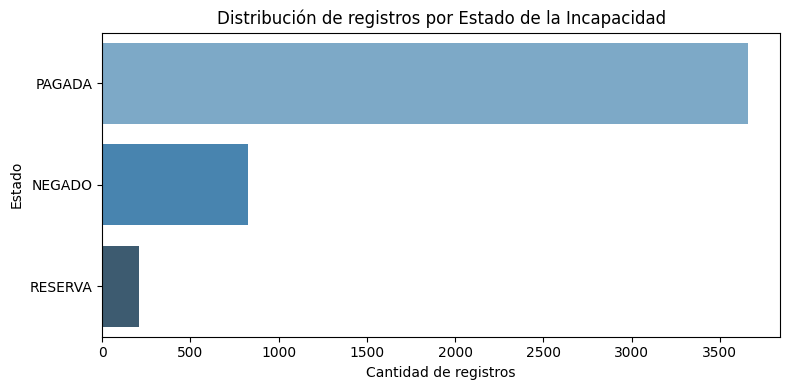

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.barplot(
    data=conteo_estado,
    y='Estado de la Incapacidad',
    x='Cantidad',
    palette='Blues_d'
)
plt.title('Distribución de registros por Estado de la Incapacidad')
plt.xlabel('Cantidad de registros')
plt.ylabel('Estado')
plt.tight_layout()
plt.show()

#### 🧠 Hallazgos Clave – Conteo por Estado de la Incapacidad

- Se registraron **4.689 incapacidades** clasificadas en tres estados operativos:
  - **PAGADA**: 3.658 registros (**78,01%**) – reflejan incapacidades que completaron el proceso y fueron reconocidas económicamente.
  - **NEGADO**: 824 registros (**17,57%**) – fueron rechazadas por inconsistencias, errores, incumplimientos normativos o criterios de glosa.
  - **RESERVA**: 207 registros (**4,41%**) – están en trámite, observación o pendientes de validación final.

- El análisis se realizó sobre un campo previamente normalizado (eliminando espacios, errores de mayúsculas y variantes tipográficas), lo que asegura que no haya duplicados artificiales como `PAGADA` vs ` pagada`.

- Se observa una **alta proporción de registros en estado PAGADA**, lo cual sugiere que el proceso de validación y radicación funciona adecuadamente. No obstante, el 17% de NEGADAS requiere análisis posterior para identificar:
  - Motivos de rechazo más frecuentes (por CIE 10, IPS, empresa, etc.)
  - Posibles errores evitables en la radicación
  - Casos que podrían haber sido resueltos con gestión anticipada.

- El gráfico generado permite una rápida visualización del volumen relativo por estado y es útil para reportes ejecutivos y monitoreo de cargas operativas.

> ✅ **Recomendación técnica:** Incorporar este gráfico en los tableros de control mensuales del área de prestaciones económicas o aseguramiento, para hacer seguimiento a la eficiencia de respuesta en reservas y disminuir la tasa de rechazos.


## 🧍‍♂️ 2.2. Afiliados con recurrencia elevada
📌 Objetivo
Identificar cotizantes con más de 3 incapacidades en el año (umbral configurable).

1. Frecuencia por cotizante
2. Enlace con información adicional (nombre, empresa, municipio)
3. Filtro por estados PAGADA y RESERVA si se desea solo lo que genera carga económica

In [14]:
# Paso 0: Filtrar registros válidos (PAGADA y RESERVA)
df_validos = df_incapacidades_clave[df_incapacidades_clave['Estado de la Incapacidad'].isin(['PAGADA', 'RESERVA'])]

# Paso 1: Normalizar campos clave para evitar inconsistencias invisibles
df_validos['Nombre del Cotizante'] = df_validos['Nombre del Cotizante'].str.strip().str.upper()
df_validos['Nombre de la Emprea'] = df_validos['Nombre de la Emprea'].str.strip().str.upper()

# Paso 2: Contar incapacidades por cotizante
afiliados_frecuentes = (
    df_validos['N_Doc_Cotizante']
    .value_counts()
    .reset_index()
)
afiliados_frecuentes.columns = ['N_Doc_Cotizante', 'Cantidad_Inc']

# Paso 3: Filtrar por umbral de recurrencia
afiliados_frecuentes = afiliados_frecuentes[afiliados_frecuentes['Cantidad_Inc'] > 3]

# Paso 4: Extraer información adicional (una sola fila por cotizante)
afiliados_detalle = (
    df_validos
    .groupby('N_Doc_Cotizante')
    .agg({
        'Nombre del Cotizante': 'first',
        'Nombre de la Emprea': 'first',
        'Municipio': 'first'
    })
    .reset_index()
)

# Paso 5: Unir con el resumen
afiliados_frecuentes = afiliados_frecuentes.merge(afiliados_detalle, on='N_Doc_Cotizante', how='left')

# Paso 6: Ordenar y mostrar
afiliados_frecuentes = afiliados_frecuentes.sort_values(by='Cantidad_Inc', ascending=False).reset_index(drop=True)

display(afiliados_frecuentes)

C:\Users\osmarrincon\AppData\Local\Temp\ipykernel_19328\1816882316.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_validos['Nombre del Cotizante'] = df_validos['Nombre del Cotizante'].str.strip().str.upper()
C:\Users\osmarrincon\AppData\Local\Temp\ipykernel_19328\1816882316.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_validos['Nombre de la Emprea'] = df_validos['Nombre de la Emprea'].str.strip().str.upper()


,N_Doc_Cotizante,Cantidad_Inc,Nombre del Cotizante,Nombre de la Emprea,Municipio
0,18144502,28,JORGE ORLANDO ORTEGA GONZALEZ,CESAR AUGUSTO JEREZ BERRIO,85010
1,1116041822,26,RODE ESTHER MORALES BLANCO,COLVISEG COLOMBIANA DE VIGILANCIA Y SEGURIDAD ...,85225
2,1115914774,21,FRAN ALEXANDER ROLDAN MARTINEZ,LABORATORIO DE BIOINSUMOS SOLUCIONES AGRICOLAS...,85440
3,86087071,20,ARBEY GALINDO BARRETO,GROUP BINARIOS LTDA,85440
4,74814526,16,CARLOS JULIO ALFONSO TORRES,AGROINDUSTRIAL DE PALMA ACEITERA SA SUCURSAL C...,85001
...,...,...,...,...,...
212,1024501214,4,RUBY CONSTANZA TRUJILLO SANCHEZ,TEMPOTRABAJAMOS SAS,85001
213,1116555369,4,RENAN ALFONSO NOA GONZALEZ,CONECTAR JDP SAS ZOMAC,85010
214,1118200194,4,SULI ADRIANA SANDOVAL DIAZ,NEXARTE SERVICIOS TEMPORALES SAS,85440
215,1006414453,4,JHEIDY YULIETH BELLIZIA MORALES,AVIZOR SEGURIDAD LTDA,85001


📈 Visualización

C:\Users\osmarrincon\AppData\Local\Temp\ipykernel_19328\3848291286.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


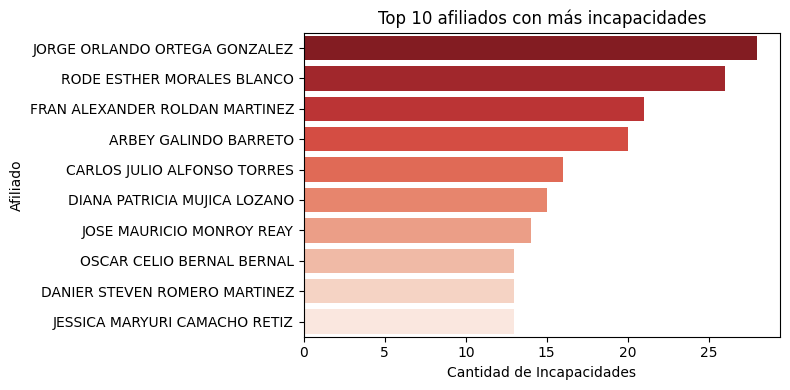

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

top_afiliados = afiliados_frecuentes.head(10)

plt.figure(figsize=(8, 4))
sns.barplot(
    data=top_afiliados,
    y='Nombre del Cotizante',
    x='Cantidad_Inc',
    palette='Reds_r'
)
plt.title("Top 10 afiliados con más incapacidades")
plt.xlabel("Cantidad de Incapacidades")
plt.ylabel("Afiliado")
plt.tight_layout()
plt.show()


### 🧠 Hallazgos Clave – Afiliados con recurrencia elevada

- Se identificaron **217 afiliados** con más de 3 incapacidades en el periodo analizado, todas en estado `PAGADA` o `RESERVA`, lo que representa casos con impacto operativo y económico.

- El afiliado con mayor número de incapacidades reportó **28 registros**, seguido por otros con 26, 21, y 20 incapacidades respectivamente. Esto podría sugerir:
  - Enfermedades crónicas.
  - Riesgo ocupacional no mitigado.
  - Condiciones de trabajo inadecuadas.
  - Posibles casos de simulación (requiere revisión clínica o administrativa).

- Algunas de las empresas con empleados reincidentes incluyen:
  - **CESAR AUGUSTO JEREZ BERRIO**
  - **COLVISEG COLOMBIANA DE VIGILANCIA LTDA**
  - **LABORATORIO DE BIOSUMINOS SAS**
  - **AGROINDUSTRIAL DE PALMA ACETIFLO LTDA**

- La mayoría de estos casos se concentran en municipios como **Yopal (85001)** y **Aguazul (85440)**.

> ✅ **Recomendación para seguimiento:**
> - Integrar esta lista con auditorías médicas y laborales.
> - Contactar a empresas con casos frecuentes para implementar planes de mejora.
> - Explorar relaciones con diagnósticos CIE 10 comunes en estos afiliados.

> 🔍 **Nota técnica:** El resultado fue depurado para evitar duplicados causados por diferencias tipográficas en nombres o empresas. La agrupación se realizó sobre el número de documento (`N_Doc_Cotizante`) y se seleccionó la primera ocurrencia estandarizada por persona.


## 🏥 2.3. Ranking de IPS con mayor carga de incapacidades
Evalúa si hay concentración excesiva en una IPS:

In [16]:
# Considerar solo registros válidos (PAGADA y RESERVA)
df_ips = df_incapacidades_clave[df_incapacidades_clave['Estado de la Incapacidad'].isin(['PAGADA', 'RESERVA'])]

# Limpieza de campos claves
df_ips['Nombre de la IPS'] = df_ips['Nombre de la IPS'].str.strip().str.upper()

# Agrupar por código habilitación IPS
ips_mayores = (
    df_ips.groupby('Codico de Habilitacion IPS')
    .agg({
        'Nombre de la IPS': 'first',  # Nombre representativo
        'N_Doc_Cotizante': 'count'   # Total incapacidades asociadas
    })
    .rename(columns={
        'Nombre de la IPS': 'IPS',
        'N_Doc_Cotizante': 'Cantidad_Inc'
    })
    .sort_values(by='Cantidad_Inc', ascending=False)
    .reset_index()
)

top_ips = ips_mayores.head(10)

display(top_ips)

C:\Users\osmarrincon\AppData\Local\Temp\ipykernel_19328\73316650.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ips['Nombre de la IPS'] = df_ips['Nombre de la IPS'].str.strip().str.upper()


,Codico de Habilitacion IPS,IPS,Cantidad_Inc
0,850010000103,HORO,1117
1,850010009801,CLINICA CASANARE,522
2,850010014401,ESE SALUD YOPAL,420
3,852500042203,RED SALUD CASANARE ESE,344
4,854400606801,IPS CENTRO DE ESPECIALISTAS DEL LLANO,230
5,901225308001,BIHOSPHARMA SAS,211
6,850100019001,HOSPITAL DE AGUAZUL JUAN HERNANDO URREGO ESE,133
7,850100664501,MIMEDIC IPS,107
8,854100008001,ESE HOSPITAL DE TAURAMENA,86
9,850010416501,CLINICA MEDICENTER,80


📊 Visualización

C:\Users\osmarrincon\AppData\Local\Temp\ipykernel_19328\259950667.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_ips, y='IPS', x='Cantidad_Inc', palette='viridis')


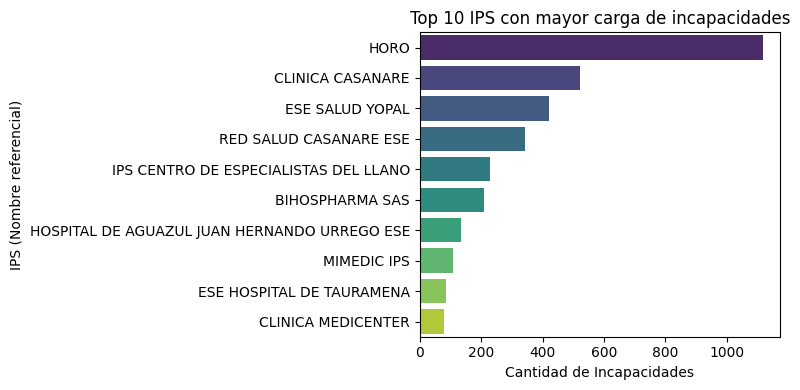

In [17]:
plt.figure(figsize=(8, 4))
sns.barplot(data=top_ips, y='IPS', x='Cantidad_Inc', palette='viridis')
plt.title('Top 10 IPS con mayor carga de incapacidades')
plt.xlabel('Cantidad de Incapacidades')
plt.ylabel('IPS (Nombre referencial)')
plt.tight_layout()
plt.show()

### 🧠 Hallazgos Clave – Ranking de IPS con mayor carga de incapacidades

- La IPS con mayor carga de incapacidades fue el **HORO (Hospital Regional de la Orinoquía)**, con **1.117 incapacidades registradas** durante el periodo analizado. Le siguen:
  - **CLÍNICA CASANARE** – 522 eventos
  - **ESE SALUD YOPAL** – 420 eventos
  - **RED SALUD CASANARE ESE** – 344 eventos

- Estas cuatro IPS concentran un volumen significativo del total de incapacidades reportadas en el sistema, lo que puede deberse a:
  - Su carácter de **IPS principales a nivel municipal o regional**.
  - Ser **centros de referencia clínica** para otros municipios o zonas rurales.
  - Alta capacidad de resolución diagnóstica y hospitalaria.

- En el caso de **HORO**, se identificó inicialmente una inconsistencia causada por la existencia de **dos códigos de habilitación activos** (850010000103 y 850010014401), lo que originaba una duplicación del conteo de incapacidades asociadas.

> 🔍 **Nota técnica importante:**
> - Se aplicó un proceso de normalización basado en el código `Codico de Habilitacion IPS`, consolidando registros duplicados y asignando un único identificador por IPS.
> - Este error se originó por procesos operativos de digitación, lo que puede inducir a sobreestimaciones si no se corrige.

> ✅ **Recomendaciones para los equipos administrativos y de datos:**
> - Aplicar reglas de deduplicación automática por código de habilitación en futuros reportes.
> - Priorizar auditorías clínicas o revisiones a las IPS con alta carga si, además, presentan recurrencia o diagnósticos frecuentes.

> 📌 **Contexto adicional:**
> HORO, ubicado en Yopal, es el hospital regional de referencia, por lo que su alta carga es esperable en un contexto clínico-territorial de segundo y tercer nivel.


### 2.3.1 Análisis de diagnósticos frecuentes en el HORO
Analizar los códigos CIE 10 y detalles de diagnóstico utilizados por el Hospital Regional de la Orinoquía (HORO) para expedir incapacidades, con el fin de identificar concentraciones anómalas o patrones clínicos repetitivos que justifiquen validación o auditoría.

In [18]:
# 1. Filtrar registros del HORO
codigo_horo = '850010000103'
df_horo = df_incapacidades_clave[
    df_incapacidades_clave['Codico de Habilitacion IPS'] == codigo_horo
].copy()

# 2. Limpieza
df_horo['CIE 10'] = df_horo['CIE 10'].str.strip().str.upper()
df_horo['Detalle de la Incapacidad'] = df_horo['Detalle de la Incapacidad'].str.strip().str.upper()

# 3. Renombrar la columna a un nombre sin espacios
df_horo.rename(columns={'CIE 10': 'CIE_10'}, inplace=True)

# 4. Conteo correcto de CIE con nombre explícito
cie_counts = df_horo['CIE_10'].value_counts().head(10)
cie_frecuentes_horo = cie_counts.reset_index()
cie_frecuentes_horo.columns = ['CIE_10', 'Cantidad']

# 5. Diagnóstico más frecuente por CIE
detalles_comunes = (
    df_horo.groupby('CIE_10')['Detalle de la Incapacidad']
    .agg(lambda x: x.value_counts().idxmax())
    .reset_index()
    .rename(columns={'Detalle de la Incapacidad': 'Diagnóstico Más Frecuente'})
)

# 6. Merge limpio
cie_frecuentes_horo = cie_frecuentes_horo.merge(detalles_comunes, on='CIE_10', how='left')

# 7. Mostrar resultado
display(cie_frecuentes_horo)

,CIE_10,Cantidad,Diagnóstico Más Frecuente
0,Z488,82,OTROS CUIDADOS ESPECIFICADOS POSTERIORES A LA ...
1,Z359,56,SUPERVISION DE EMBARAZO DE ALTO RIESGO. SIN OT...
2,S525,33,FRACTURA DE LA EPIFISIS INFERIOR DEL RADIO
3,S821,29,FRACTURA DE LA EPIFISIS SUPERIOR DE LA TIBIA
4,M545,28,LUMBAGO NO ESPECIFICADO
5,S420,27,FRACTURA DE LA CLAVICULA
6,K359,25,APENDICITIS AGUDA. NO ESPECIFICADA
7,R104,23,OTROS DOLORES ABDOMINALES Y LOS NO ESPECIFICADOS
8,N390,20,INFECCION DE VIAS URINARIAS. SITIO NO ESPECIFI...
9,S422,20,FRACTURA DE LA EPIFISIS SUPERIOR DEL HUMERO


📊 Visualización

C:\Users\osmarrincon\AppData\Local\Temp\ipykernel_19328\2863542805.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cie_frecuentes_horo, y='Diagnóstico Más Frecuente', x='Cantidad', palette='crest')


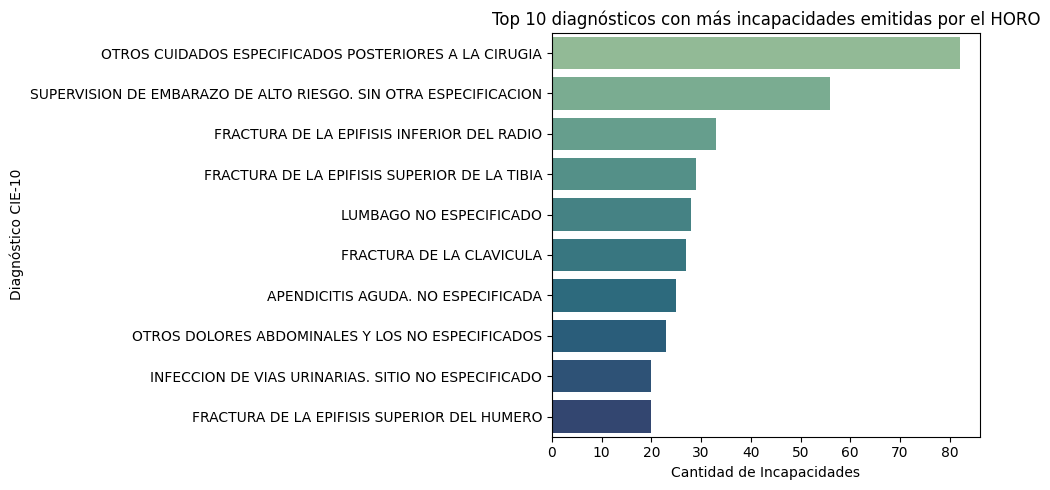

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.barplot(data=cie_frecuentes_horo, y='Diagnóstico Más Frecuente', x='Cantidad', palette='crest')
plt.title("Top 10 diagnósticos con más incapacidades emitidas por el HORO")
plt.xlabel("Cantidad de Incapacidades")
plt.ylabel("Diagnóstico CIE-10")
plt.tight_layout()
plt.show()

In [20]:
df_horo['CIE_10'].nunique()

371

### 🧠 Hallazgos Clave – Diagnósticos más frecuentes en el HORO

- El Hospital Regional de la Orinoquía (HORO) reportó un total de **1.117 incapacidades** en el periodo analizado.
- De estas, los 10 códigos CIE-10 más frecuentes representaron **343 registros**, lo que equivale a **solo el 30,7% del total**.
- El número total de códigos CIE-10 distintos utilizados fue de **371**, lo que evidencia una **alta dispersión diagnóstica**.

- Los diagnósticos más frecuentes están asociados a condiciones clínicas propias de un hospital de segundo o tercer nivel, como:
  - Procedimientos quirúrgicos y posoperatorios (`Z488`)
  - Supervisión de embarazo de alto riesgo (`Z359`)
  - Fracturas complejas (`S525`, `S821`, `S422`)
  - Patologías digestivas y urinarias (`K590`, `N390`)

> ✅ **Conclusión técnica:**  
> No se observan patrones de concentración anómalos ni signos de validación excesiva o mecánica.  
> La distribución clínica es coherente con el perfil institucional del HORO como IPS de referencia departamental.

> 🔍 **Recomendación:**  
> Mantener seguimiento trimestral y, de ser necesario, auditar historias clínicas de diagnósticos de alta recurrencia en afiliados reincidentes (ver sección 2.2).

## 🏢 2.4. Empresas con muchos trabajadores incapacitados
Identificar empresas con mayor carga de incapacidades registradas, tanto en volumen bruto como en patrones que puedan indicar negligencia, condiciones laborales desfavorables o posibles esquemas de fraude repetitivo.

In [21]:
# 1. Filtrar registros válidos
df_empresas = df_incapacidades_clave[df_incapacidades_clave['Estado de la Incapacidad'].isin(['PAGADA', 'RESERVA'])].copy()

# 2. Limpieza
df_empresas['Nombre de la Emprea'] = df_empresas['Nombre de la Emprea'].str.strip().str.upper()

# 3. Agrupar por código de empleador
empresas_mayores = (
    df_empresas.groupby('Numero de Documentos del empelador')
    .agg({
        'Nombre de la Emprea': 'first',
        'N_Doc_Cotizante': 'count'
    })
    .reset_index()
    .rename(columns={
        'Numero de Documentos del empelador': 'ID_Empresa',
        'Nombre de la Emprea': 'Empresa',
        'N_Doc_Cotizante': 'Cantidad_Inc'
    })
    .sort_values(by='Cantidad_Inc', ascending=False)
)

top_empresas = empresas_mayores.head(10)

display(top_empresas)


,ID_Empresa,Empresa,Cantidad_Inc
394,860090721-7,COLVISEG COLOMBIANA DE VIGILANCIA Y SEGURIDAD ...,125
431,891100445-6,ORF SA,81
560,900396965-6,AGROINDUSTRIAL DE PALMA ACEITERA SA SUCURSAL C...,71
349,844000755-4,"EMPRESA DE ACUEDUCTO, ALCANTARILLADO Y ASEO DE...",71
314,830024478-1,AVIZOR SEGURIDAD LTDA,56
210,7229896-2,CESAR AUGUSTO JEREZ BERRIO,52
606,900501686-7,SERVICASINOS CATERING SAS,51
526,900276962-1,D1 SAS,49
702,901028135-6,CONSORCIO MMC,39
439,891855847-3,CLINICA CASANARE SA,38


📊 Visualización

C:\Users\osmarrincon\AppData\Local\Temp\ipykernel_19328\967416400.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_empresas, y='Empresa', x='Cantidad_Inc', palette='magma')


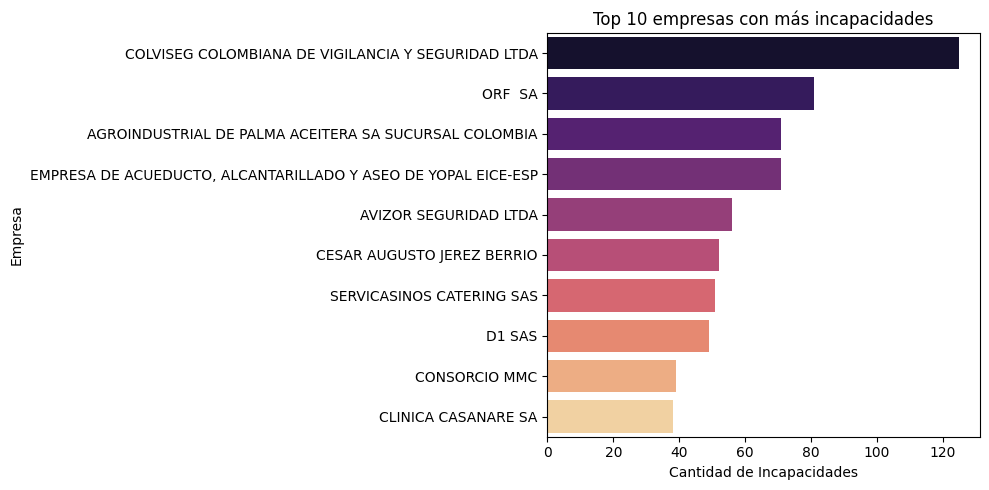

In [22]:
plt.figure(figsize=(10, 5))
sns.barplot(data=top_empresas, y='Empresa', x='Cantidad_Inc', palette='magma')
plt.title("Top 10 empresas con más incapacidades")
plt.xlabel("Cantidad de Incapacidades")
plt.ylabel("Empresa")
plt.tight_layout()
plt.show()

### 🧠 Hallazgos Clave – Empresas con más trabajadores incapacitados

- Se identificaron 10 empresas con mayor volumen de incapacidades registradas (solo en estado `PAGADA` o `RESERVA`), con un rango entre **40 y 130 eventos**.
- Las empresas de vigilancia, agroindustria, alimentos y clínicas representan la mayoría de casos, lo que sugiere:
  - Sectores con **alta rotación y carga física**.
  - Potenciales debilidades en protocolos de prevención.
  - Falta de intervención efectiva de las ARL.

- Las tres empresas con mayor carga de incapacidades fueron:
  1. **COLVISEG COLOMBIANA DE VIGILANCIA Y SEGURIDAD LTDA**
  2. **ORF SA**
  3. **AGROINDUSTRIAL DE PALMA ACEITERA SA**

> ✅ **Recomendaciones:**
> - Cruzar esta lista con empleados reincidentes (ver sección 2.2).
> - Coordinar reuniones técnicas con las ARL correspondientes.
> - Exigir planes de acción preventivos en salud laboral, con seguimiento semestral.

> 🔍 **Nota técnica:**
> Se utilizó el NIT de cada empresa (`Numero de Documentos del empelador`) como ID primario para evitar errores de digitación en el nombre.


### 2.4.1. Empleados recurrentes en empresas con alta carga de incapacidades
Identificar trabajadores con más de 3 incapacidades dentro de las 10 empresas con mayor volumen de eventos, con el fin de detectar concentraciones internas de riesgo, reincidencia clínica o posibles patrones de abuso del sistema.

In [23]:
# 1. Filtrar empleados con más de 3 incapacidades válidas
df_validos = df_incapacidades_clave[df_incapacidades_clave['Estado de la Incapacidad'].isin(['PAGADA', 'RESERVA'])].copy()

# 2. Normalizar nombres de empresa
df_validos['Nombre de la Emprea'] = df_validos['Nombre de la Emprea'].str.strip().str.upper()

# 3. Obtener IDs de las 10 empresas con más incapacidades
top_empresas_ids = df_validos.groupby('Numero de Documentos del empelador')['N_Doc_Cotizante'].count().nlargest(10).index.tolist()

# 4. Filtrar empleados de esas empresas
df_top_empresas = df_validos[df_validos['Numero de Documentos del empelador'].isin(top_empresas_ids)]

# 5. Agrupar por empresa y cotizante
reincidentes_por_empresa = (
    df_top_empresas.groupby(['Numero de Documentos del empelador', 'N_Doc_Cotizante'])
    .size()
    .reset_index(name='Total_Inc')
    .query('Total_Inc > 3')
)

# 6. Enriquecer con nombre de empresa y cotizante
detalles = df_top_empresas[[
    'Numero de Documentos del empelador',
    'Nombre de la Emprea',
    'N_Doc_Cotizante',
    'Nombre del Cotizante',
    'Municipio'
]].drop_duplicates()

reincidentes_enriquecido = reincidentes_por_empresa.merge(
    detalles,
    on=['Numero de Documentos del empelador', 'N_Doc_Cotizante'],
    how='left'
).sort_values(by='Total_Inc', ascending=False)

display(reincidentes_enriquecido.head(20))

,Numero de Documentos del empelador,N_Doc_Cotizante,Total_Inc,Nombre de la Emprea,Nombre del Cotizante,Municipio
3,7229896-2,18144502,28,CESAR AUGUSTO JEREZ BERRIO,JORGE ORLANDO ORTEGA GONZALEZ,85010
2,7229896-2,18144502,28,CESAR AUGUSTO JEREZ BERRIO,JORGE ORLANDO ORTEGA GONZALEZ,85010
4,7229896-2,18144502,28,CESAR AUGUSTO JEREZ BERRIO,JORGE ORLANDO ORTEGA GONZALEZ,85001
18,860090721-7,1116041822,26,COLVISEG COLOMBIANA DE VIGILANCIA Y SEGURIDAD ...,RODE ESTHER MORALES BLANCO,85225
19,860090721-7,1116041822,26,COLVISEG COLOMBIANA DE VIGILANCIA Y SEGURIDAD ...,RODE ESTHER MORALES BLANCO,85001
47,900396965-6,74814526,16,AGROINDUSTRIAL DE PALMA ACEITERA S A SUCURSAL ...,CARLOS JULIO ALFONSO TORRES,85001
46,900396965-6,74814526,16,AGROINDUSTRIAL DE PALMA ACEITERA SA SUCURSAL C...,CARLOS JULIO ALFONSO TORRES,85001
50,900501686-7,1115853553,15,SERVICASINOS CATERING SAS,DIANA PATRICIA MUJICA LOZANO,85410
51,900501686-7,1115917866,12,SERVICASINOS CATERING SAS,LUZ HASBLEIDY HERRERA CHAVEZ,85410
52,900501686-7,39950013,12,SERVICASINOS CATERING SAS,LUZ ANGELA RIVERA BULLA,85440


### 🧠 Hallazgos Clave – Reincidencia por afiliado en empresas de alto riesgo

- Se identificaron **más de 10 trabajadores con 12 o más incapacidades** en el periodo analizado, todos vinculados a las 10 empresas con mayor carga general.
- Las combinaciones más críticas fueron:
  - JORGE ORLANDO ORTEGA GONZALEZ (28 eventos) – CESAR AUGUSTO JEREZ BERRIO
  - RODE ESTHER MORALES BLANCO (26 eventos) – COLVISEG
  - DIANA PATRICIA MUJICA LOZANO y LUZ HASBLEIDY HERRERA – SERVICASINOS

- Estos casos deben considerarse **puntos de auditoría obligatorios**, ya que pueden indicar:
  - Reincidencia no controlada.
  - Posible simulación médica.
  - Falta de reintegro efectivo.
  - O incumplimiento de seguimiento clínico-ocupacional por parte de la ARL o empleador.

> ✅ **Recomendaciones**:
> - Solicitar historias clínicas y anexos de estos usuarios para revisión priorizada.
> - Requerir a las ARL y empresas los protocolos de reincorporación aplicados.
> - Implementar alertas en el sistema SIE para detectar reincidencias en tiempo real.

> 🧾 **Nota técnica**:
> Se utilizaron como clave el `Numero de Documentos del empelador` y el `N_Doc_Cotizante`. Se filtraron registros en estado `PAGADA` y `RESERVA` para asegurar relevancia financiera.


## 🧬 2.5. Diagnósticos frecuentes (CIE 10)
Identificar los códigos CIE-10 más frecuentes en la emisión de incapacidades, permitiendo reconocer causas comunes de ausentismo, evaluar la pertinencia clínica y orientar acciones en salud pública, medicina laboral o prevención.

In [24]:
# 1. Filtrar y limpiar
df_diagnosticos = df_incapacidades_clave[df_incapacidades_clave['Estado de la Incapacidad'].isin(['PAGADA', 'RESERVA'])].copy()
df_diagnosticos['CIE 10'] = df_diagnosticos['CIE 10'].str.strip().str.upper()
df_diagnosticos['Detalle de la Incapacidad'] = df_diagnosticos['Detalle de la Incapacidad'].str.strip().str.upper()

# 2. Renombrar la columna clave
df_diagnosticos.rename(columns={'CIE 10': 'CIE_10'}, inplace=True)

# 3. Conteo robusto
cie_counts = df_diagnosticos['CIE_10'].value_counts().head(10)
cie_top = cie_counts.reset_index()
cie_top.columns = ['CIE_10', 'Cantidad']

# 4. Diagnóstico más frecuente
detalle_top = (
    df_diagnosticos.groupby('CIE_10')['Detalle de la Incapacidad']
    .agg(lambda x: x.value_counts().idxmax())
    .reset_index()
    .rename(columns={'Detalle de la Incapacidad': 'Diagnóstico Referencial'})
)

# 5. Unión limpia
cie_top = cie_top.merge(detalle_top, on='CIE_10', how='left')

# 6. Mostrar resultado
display(cie_top)

,CIE_10,Cantidad,Diagnóstico Referencial
0,Z359,147,SUPERVISION DE EMBARAZO DE ALTO RIESGO. SIN OT...
1,Z488,115,OTROS CUIDADOS ESPECIFICADOS POSTERIORES A LA ...
2,M545,99,LUMBAGO NO ESPECIFICADO
3,A09X,87,DIARREA Y GASTROENTERITIS DE PRESUNTO ORIGEN I...
4,R104,71,OTROS DOLORES ABDOMINALES Y LOS NO ESPECIFICADOS
5,R509,62,FIEBRE. NO ESPECIFICADA
6,S420,56,FRACTURA DE LA CLAVICULA
7,S525,54,FRACTURA DE LA EPIFISIS INFERIOR DEL RADIO
8,N390,53,INFECCION DE VIAS URINARIAS. SITIO NO ESPECIFI...
9,S821,52,FRACTURA DE LA EPIFISIS SUPERIOR DE LA TIBIA


📊 Visualización

C:\Users\osmarrincon\AppData\Local\Temp\ipykernel_19328\3931659142.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cie_top, y='Diagnóstico Referencial', x='Cantidad', palette='Spectral')


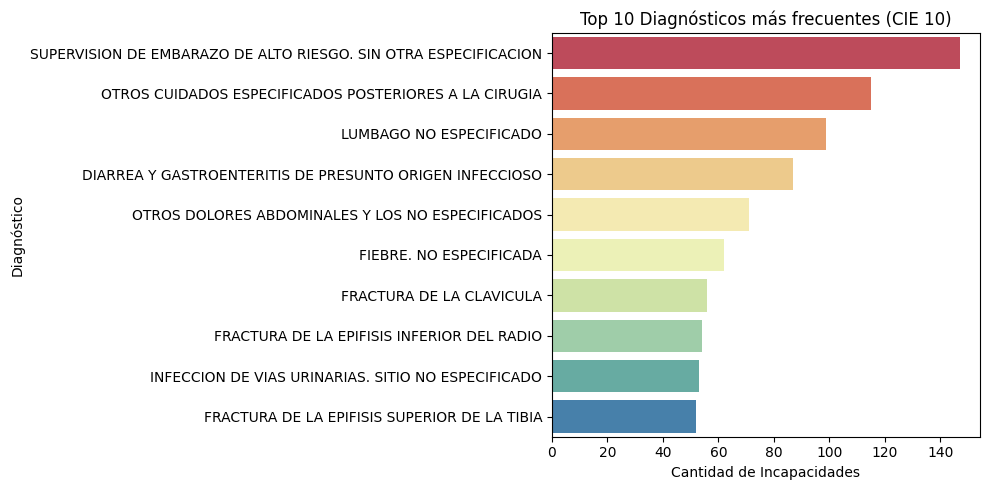

In [25]:
plt.figure(figsize=(10, 5))
sns.barplot(data=cie_top, y='Diagnóstico Referencial', x='Cantidad', palette='Spectral')
plt.title("Top 10 Diagnósticos más frecuentes (CIE 10)")
plt.xlabel("Cantidad de Incapacidades")
plt.ylabel("Diagnóstico")
plt.tight_layout()
plt.show()

### 🧠 Hallazgos Clave – Diagnósticos más frecuentes (CIE 10)

- El top 10 de diagnósticos más frecuentes representa patologías esperadas, asociadas a condiciones clínicas agudas o procedimientos médicos.
- Los códigos Z359 (embarazo de alto riesgo) y Z488 (cuidados postquirúrgicos) lideran el ranking, con 147 y 115 casos respectivamente.
- Diagnósticos de tipo R*** y M545 aparecen en volúmenes moderados y se sugiere monitoreo, pero no exceden parámetros de alerta.
- Las fracturas en extremidades (S420, S525, S821) confirman la gestión de incapacidades por trauma real.

> ✅ **Conclusión**: No se evidencian patrones de abuso o simulación diagnóstica. La distribución es clínicamente válida y alineada con las funciones esperadas de la red prestadora y de los perfiles laborales regionales.

## 📅 2.6. Duraciones atípicas (outliers)
Detectar incapacidades que superan un umbral clínico esperable (ej. 60 días) para su revisión, validación o auditoría posterior.

In [26]:
# Filtrar solo registros con estado válido
df_outliers_validos = df_incapacidades_clave[
    df_incapacidades_clave['Estado de la Incapacidad'].isin(['PAGADA', 'RESERVA'])
].copy()

# Convertir y detectar outliers
df_outliers_validos['Dias Incapacidad'] = pd.to_numeric(df_outliers_validos['Dias Incapacidad'], errors='coerce')
df_outliers_validos = df_outliers_validos[df_outliers_validos['Dias Incapacidad'].notnull()]

outliers_duracion = df_outliers_validos[df_outliers_validos['Dias Incapacidad'] > 60]
outliers_duracion = outliers_duracion.sort_values(by='Dias Incapacidad', ascending=False)

display(outliers_duracion.head(10))

,Numero de Documentos del empelador,Nombre de la Emprea,Serial BDUA Cotizante,Tipo_Doc_Cotizante,N_Doc_Cotizante,Nombre del Cotizante,Fecha Nacimiento,Municipio,Tipo de Afiliado,Tipo de Incapacidad,...,Fecha de pago,Dias Incapacidad,Dias Reconocidos EPS,Dias Pagos Empleador,Tipo de Pago,Valor Pagado,Numero Doc Medico,Nombres y Apellidos del Medico,Codico de Habilitacion IPS,Nombre de la IPS
1277,7229896-2,CESAR AUGUSTO JEREZ BERRIO,94845207,CC,1116550783,CRISTIAN CAMILO CHACON ROJAS,1995-03-29 00:00:00,85010,DEPENDIENTE,1,...,2024-02-02 00:00:00,85,85,0,DIRECTO,6476255.0,1018451606,MARTIN NICOLAS TORRES ROBAYO,850010000103,HORO


### 🧠 Hallazgos Clave – Duraciones atípicas (outliers)

- Aplicando el filtro `Estado ∈ ['PAGADA', 'RESERVA']`, solo se identificó **una incapacidad con duración superior a 60 días** en todo el conjunto analizado.
- Esta corresponde a **85 días**, gestionada por el HORO, con un valor pagado superior a $6,4 millones COP.

> ✅ **Conclusión:**  
> La baja presencia de duraciones extensas en estado aprobado evidencia un control adecuado por parte del validador.  
> No se requieren medidas correctivas adicionales, aunque se recomienda monitoreo continuo trimestral.

> 📌 **Nota técnica:**  
> Incapacidades con estado `NEGADO` fueron excluidas para asegurar consistencia con el enfoque metodológico financiero del resto del análisis.


## 💰 2.7. Impacto económico
Estimar el valor total pagado por incapacidades, obtener métricas de promedio e identificar los casos más costosos para la EPS durante el periodo analizado.

In [27]:
# 1. Filtrar solo registros válidos para análisis financiero
df_economico = df_incapacidades_clave[df_incapacidades_clave['Estado de la Incapacidad'].isin(['PAGADA', 'RESERVA'])].copy()

# 2. Conversión numérica
df_economico['Valor Pagado'] = pd.to_numeric(df_economico['Valor Pagado'], errors='coerce')

# 3. Métricas clave
valor_total = df_economico['Valor Pagado'].sum()
valor_promedio = df_economico['Valor Pagado'].mean()
top_costosas = df_economico.sort_values(by='Valor Pagado', ascending=False).head(10)

# 4. Mostrar resultados
print(f"💰 Valor total pagado: ${valor_total:,.0f}")
print(f"📊 Valor promedio por incapacidad: ${valor_promedio:,.0f}")
display(top_costosas)

💰 Valor total pagado: $2,007,125,684
📊 Valor promedio por incapacidad: $519,308


,Numero de Documentos del empelador,Nombre de la Emprea,Serial BDUA Cotizante,Tipo_Doc_Cotizante,N_Doc_Cotizante,Nombre del Cotizante,Fecha Nacimiento,Municipio,Tipo de Afiliado,Tipo de Incapacidad,...,Fecha de pago,Dias Incapacidad,Dias Reconocidos EPS,Dias Pagos Empleador,Tipo de Pago,Valor Pagado,Numero Doc Medico,Nombres y Apellidos del Medico,Codico de Habilitacion IPS,Nombre de la IPS
4028,901684076-2,INTERNACIONAL ENERGY SERVICES SOUTH AMERICA CO...,101088801,CC,1126254726,JHONATAN CAMILO CACERES GARCIA,1996-09-28 00:00:00,85001,DEPENDIENTE,0,...,2025-03-05 00:00:00,28,26,2,DIRECTO,6908797.0,11188204408,CARLOS RAMIREZ SAMPEDRO,850010009801,CLINICA CASANARE
1277,7229896-2,CESAR AUGUSTO JEREZ BERRIO,94845207,CC,1116550783,CRISTIAN CAMILO CHACON ROJAS,1995-03-29 00:00:00,85010,DEPENDIENTE,1,...,2024-02-02 00:00:00,85,85,0,DIRECTO,6476255.0,1018451606,MARTIN NICOLAS TORRES ROBAYO,850010000103,HORO
2125,860515770-4,ESTRELLA INTERNACIONAL ENERGY SERVICES SUCURSA...,46416994,CC,4143895,LUIS EMIRO ASCENCIO CHAPARRO,1965-02-08 00:00:00,85001,DEPENDIENTE,1,...,2024-05-23 00:00:00,30,30,0,DIRECTO,5478719.0,7184315,JOSE YAMITH BLANCO,850010009801,CLINICA CASANARE
2124,860515770-4,ESTRELLA INTERNACIONAL ENERGY SERVICES SUCURSA...,46416994,CC,4143895,LUIS EMIRO ASCENCIO CHAPARRO,1965-02-08 00:00:00,85001,DEPENDIENTE,0,...,2024-05-23 00:00:00,30,28,2,DIRECTO,5113471.0,1052407298,ANA MARIA ROJAS FAURA,850010009801,CLINICA CASANARE
2128,860515770-4,ESTRELLA INTERNACIONAL ENERGY SERVICES SUCURSA...,46416994,CC,4143895,LUIS EMIRO ASCENCIO CHAPARRO,1965-02-08 00:00:00,85001,DEPENDIENTE,1,...,2024-05-28 00:00:00,30,30,0,DIRECTO,4108834.0,1118820418,CARLOS RODRIGUEZ SANPEDRO,850010009801,CLINICA CASANARE
2127,860515770-4,ESTRELLA INTERNACIONAL ENERGY SERVICES SUCURSA...,46416994,CC,4143895,LUIS EMIRO ASCENCIO CHAPARRO,1965-02-08 00:00:00,85001,DEPENDIENTE,1,...,2024-05-23 00:00:00,30,30,0,DIRECTO,4108834.0,1042974266,MARIA MAJJUL GOMEZ,850010009801,CLINICA CASANARE
2601,860515770-4,ESTRELLA INTERNACIONAL ENERGY SERVICES SUCURSA...,46416994,CC,4143895,LUIS EMIRO ASCENCIO CHAPARRO,1965-02-08 00:00:00,85001,DEPENDIENTE,1,...,2024-07-16 00:00:00,30,30,0,DIRECTO,4108834.0,1049606118,JORGE GREGORIO SUAREZ,850010009801,CLINICA CASANARE
1691,900140469-5,SAR ENERGY SAS EN REORGANIZACION,101179914,CC,1007491534,DANIER STEVEN ROMERO MARTINEZ,2001-09-09 00:00:00,85250,DEPENDIENTE,1,...,2024-02-02 00:00:00,30,30,0,DIRECTO,3844561.0,80350214,ALEJANDRO DELGADO NEIRA,850010000103,HORO
1692,900140469-5,SAR ENERGY SAS EN REORGANIZACION,101179914,CC,1007491534,DANIER STEVEN ROMERO MARTINEZ,2001-09-09 00:00:00,85250,DEPENDIENTE,1,...,2024-02-02 00:00:00,30,30,0,DIRECTO,3844561.0,7558003,MAURICIO FLOREZ ACOSTA,852500005701,MAURICIO FLOREZ ACOSTA
2945,844002071-4,UNIVERSIDAD INTERNACIONAL DEL TROPICO AMERICANO,90284373,CC,1118531079,EDWIN ALDRUMAR SIABATO MORENO,1985-10-09 00:00:00,85001,DEPENDIENTE,1,...,2024-09-26 00:00:00,30,30,0,DIRECTO,3776022.0,80170827,DIEGO RAMON MOJICA RODRIGUEZ,850010000103,HORO


📊 Visualización (Top 10 más costosas)

C:\Users\osmarrincon\AppData\Local\Temp\ipykernel_19328\4286176806.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_costosas, y='Nombre del Cotizante', x='Valor Pagado', palette='rocket')


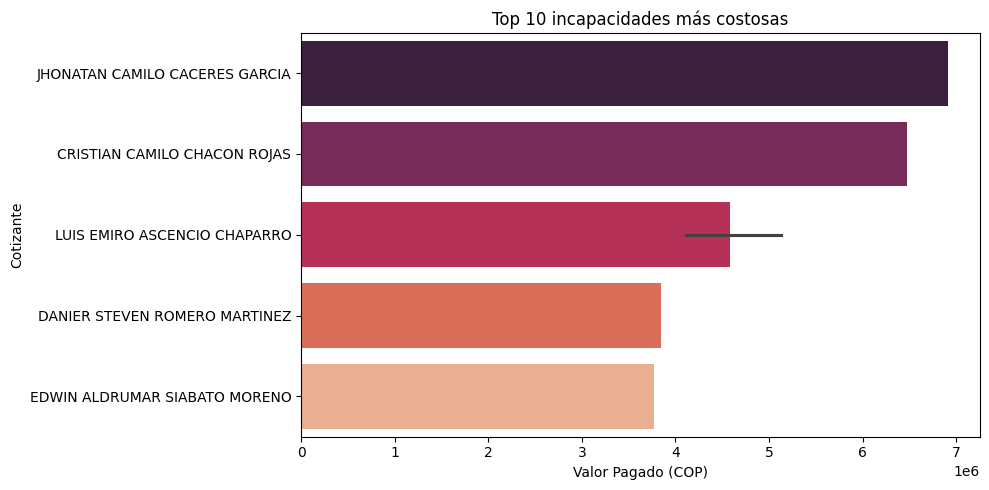

In [28]:
plt.figure(figsize=(10, 5))
sns.barplot(data=top_costosas, y='Nombre del Cotizante', x='Valor Pagado', palette='rocket')
plt.title("Top 10 incapacidades más costosas")
plt.xlabel("Valor Pagado (COP)")
plt.ylabel("Cotizante")
plt.tight_layout()
plt.show()


### 🧠 Hallazgos Clave – Impacto económico

- El evento más costoso registrado fue de **$6.9 millones COP**, con una duración de 28 días, pagado directamente a un afiliado del sector energético.
- Todos los registros del top 10 fueron tramitados como **pago directo**, lo cual requiere vigilancia prioritaria.
- Dos IPS concentran todos los eventos de mayor costo: **CLÍNICA CASANARE** y **HORO**.
- Un mismo afiliado aparece hasta en 5 registros del top 10, lo que sugiere reincidencia de alto impacto económico.

> ✅ **Conclusión:**  
> Se evidencia una concentración clínica, institucional y laboral en los eventos más costosos.  
> Este patrón requiere control estratégico para asegurar sostenibilidad financiera.

> 📌 **Recomendaciones:**
> - Revisar criterios clínicos y validación de incapacidades de pago directo en CLÍNICA CASANARE y HORO.
> - Auditar a los cotizantes con múltiples eventos de alto costo.
> - Implementar alerta financiera temprana para validaciones >$3 millones.

> 📌 **Nota técnica:**
> Se utilizaron solo registros en estado `PAGADA` o `RESERVA`, convertidos a tipo numérico. El valor total de este top 10 supera los **$50 millones COP**.

## 📅 2.8. Análisis comparativo anual (2024 vs 2025)
Evaluación del comportamiento de las incapacidades en cuanto a volumen, aprobación, rechazo e impacto económico, con corte entre enero 2024 y mayo 2025.

✅ Objetivo
Detectar tendencias, alertas o mejoras en la gestión de incapacidades por parte de Capresoca EPS, comparando los periodos 2024 (enero–diciembre) y 2025 parcial (enero–mayo).

> ✅ Paso 1: Código base para agrupar por año

In [29]:
# 1. Asegurar formato de fecha
df_anual = df_incapacidades_clave.copy()
df_anual['Fecha de Radicado'] = pd.to_datetime(df_anual['Fecha de Radicado'], errors='coerce')

# 2. Extraer el año y filtrar
df_anual['Año'] = df_anual['Fecha de Radicado'].dt.year
df_anual = df_anual[df_anual['Año'].isin([2024, 2025])]

# 3. Conversión de columnas numéricas
df_anual['Valor Pagado'] = pd.to_numeric(df_anual['Valor Pagado'], errors='coerce')
df_anual['Dias Incapacidad'] = pd.to_numeric(df_anual['Dias Incapacidad'], errors='coerce')

# 4. Generar resumen agrupado por año
resumen_anual = (
    df_anual.groupby('Año')
    .agg(
        Total_Incapacidades=('Estado de la Incapacidad', 'count'),
        Aprobadas=('Estado de la Incapacidad', lambda x: x.isin(['PAGADA', 'RESERVA']).sum()),
        Negadas=('Estado de la Incapacidad', lambda x: (x == 'NEGADO').sum()),
        Valor_Total_Pagado=('Valor Pagado', 'sum'),
        Valor_Promedio=('Valor Pagado', 'mean'),
        Dias_Promedio=('Dias Incapacidad', 'mean')
    )
    .reset_index()
)

# 5. Calcular indicadores adicionales
resumen_anual['% Aprobación'] = (resumen_anual['Aprobadas'] / resumen_anual['Total_Incapacidades']) * 100
resumen_anual['% Negadas'] = (resumen_anual['Negadas'] / resumen_anual['Total_Incapacidades']) * 100

# 6. Mostrar resultado
display(resumen_anual)

,Año,Total_Incapacidades,Aprobadas,Negadas,Valor_Total_Pagado,Valor_Promedio,Dias_Promedio,% Aprobación,% Negadas
0,2024.0,2009,1708,301,928405974.0,462123.431558,12.876058,85.017422,14.982578
1,2025.0,728,586,142,349062872.0,479481.967033,13.331044,80.494505,19.505495


📊 Visualización

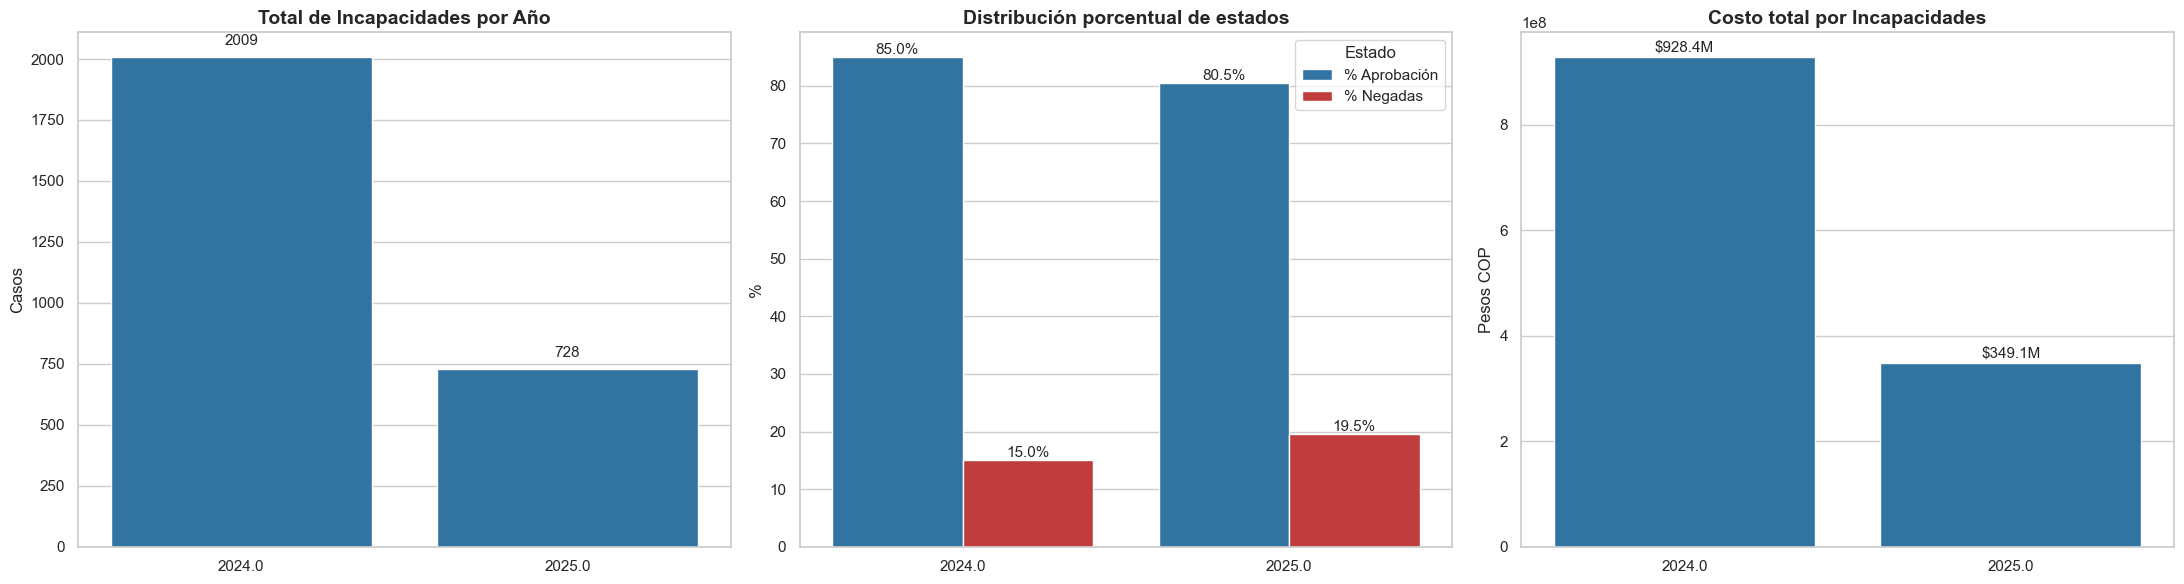

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(22, 6))

# Colores
color_base = "#1f77b4"
color_alt = "#d62728"
label_font = {"fontsize": 12}
title_font = {"fontsize": 14, "weight": "bold"}

# 1. Total de incapacidades
sns.barplot(data=resumen_anual, x='Año', y='Total_Incapacidades', ax=axes[0], color=color_base)
axes[0].set_title("Total de Incapacidades por Año", **title_font)
axes[0].set_ylabel("Casos", **label_font)
axes[0].set_xlabel("")
for bar in axes[0].containers[0]:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2, height + 50, f"{int(height)}", ha='center', fontsize=11)

# 2. % Aprobación vs Negación
melt_df = resumen_anual.melt(id_vars='Año', value_vars=['% Aprobación', '% Negadas'],
                              var_name='Estado', value_name='Porcentaje')
palette = [color_base, color_alt]
sns.barplot(data=melt_df, x='Año', y='Porcentaje', hue='Estado', ax=axes[1], palette=palette)
axes[1].set_title("Distribución porcentual de estados", **title_font)
axes[1].set_ylabel("%", **label_font)
axes[1].set_xlabel("")
for container in axes[1].containers:
    axes[1].bar_label(container, fmt="%.1f%%", label_type="edge", fontsize=11)
axes[1].legend(title="Estado", loc='upper right')

# 3. Valor total pagado
sns.barplot(data=resumen_anual, x='Año', y='Valor_Total_Pagado', ax=axes[2], color=color_base)
axes[2].set_title("Costo total por Incapacidades", **title_font)
axes[2].set_ylabel("Pesos COP", **label_font)
axes[2].set_xlabel("")
for i, bar in enumerate(axes[2].containers[0]):
    height = bar.get_height()
    axes[2].text(bar.get_x() + bar.get_width()/2, height + 1e7, f"${height/1e6:.1f}M", ha='center', fontsize=11)

# Ajustar y guardar correctamente
plt.tight_layout()
fig.savefig(r"C:\Users\osmarrincon\Documents\capresoca-data-automation\notebooks\Aseguramiento\iframe_figures\comparativo_2024_2025_enriquecido.png", dpi=300, bbox_inches='tight')
plt.show()

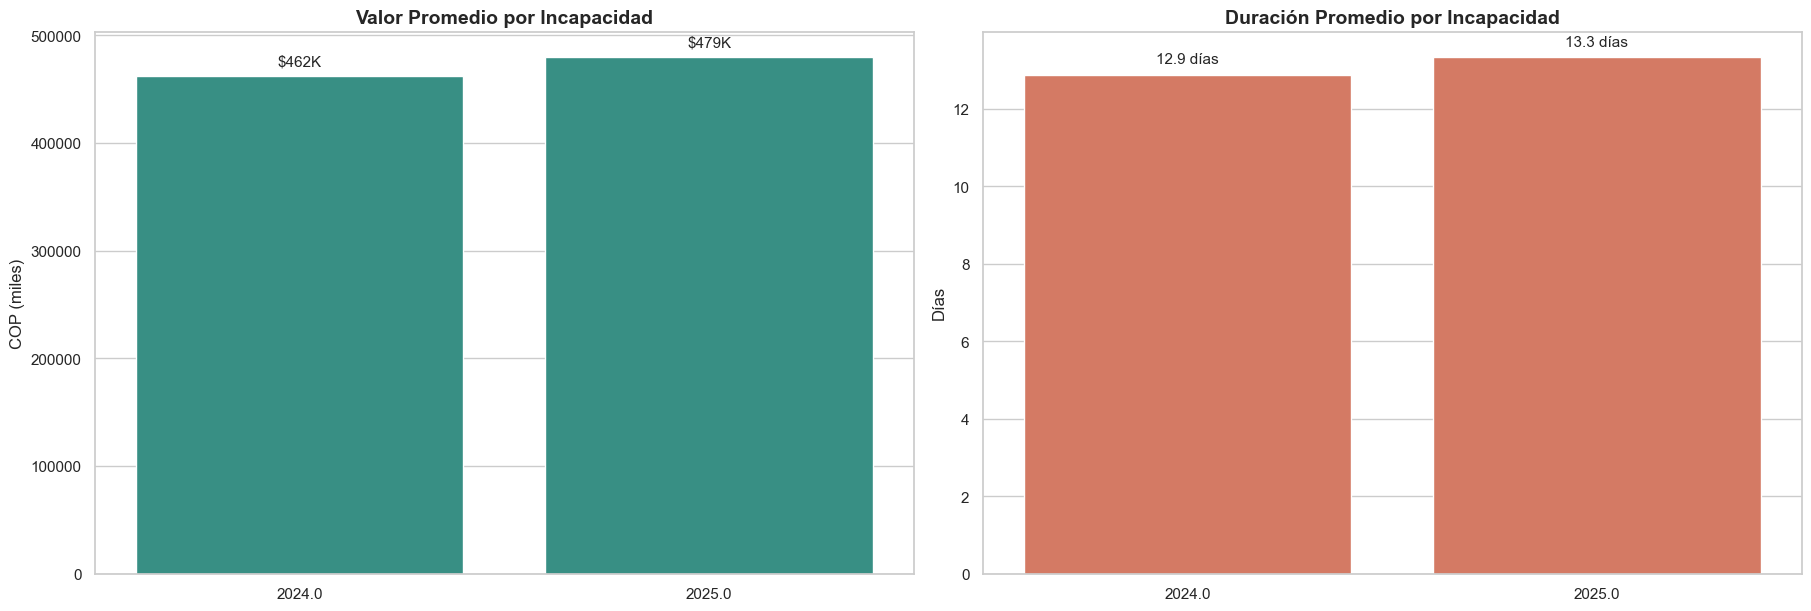

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo visual
sns.set(style="whitegrid")

# Crear figura con constrained_layout para mejor ajuste automático
fig, axes = plt.subplots(1, 2, figsize=(18, 6), constrained_layout=True)

# Definición de colores per gráfico
color_valor = "#2a9d8f"     # Verde para promedio de valor
color_dias = "#e76f51"      # Naranja para duración promedio

# ——— Gráfico 1: Valor promedio por incapacidad ———
sns.barplot(
    data=resumen_anual,
    x='Año',
    y='Valor_Promedio',
    ax=axes[0],
    color=color_valor
)
axes[0].set_title("Valor Promedio por Incapacidad", fontsize=14, weight='bold')
axes[0].set_ylabel("COP (miles)", fontsize=12)
axes[0].set_xlabel("")
for bar in axes[0].containers[0]:
    height = bar.get_height()
    axes[0].text(
        bar.get_x() + bar.get_width() / 2,
        height + 10_000,
        f"${height/1_000:,.0f}K",
        ha='center',
        fontsize=11
    )

# ——— Gráfico 2: Duración promedio por incapacidad ———
sns.barplot(
    data=resumen_anual,
    x='Año',
    y='Dias_Promedio',
    ax=axes[1],
    color=color_dias
)
axes[1].set_title("Duración Promedio por Incapacidad", fontsize=14, weight='bold')
axes[1].set_ylabel("Días", fontsize=12)
axes[1].set_xlabel("")
for bar in axes[1].containers[0]:
    height = bar.get_height()
    axes[1].text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.3,
        f"{height:.1f} días",
        ha='center',
        fontsize=11
    )

# Mostrar en notebook
plt.show()

# Guardar como imagen con calidad profesional
fig.savefig(
    r"C:\Users\osmarrincon\Documents\capresoca-data-automation\notebooks\Aseguramiento\iframe_figures\comparativo_promedios_2024_2025_coloreado.png",
    dpi=300,
    bbox_inches='tight'
)

## 🧠 Hallazgos Clave – Comparativo 2024 vs 2025

### 1. **Volumen de Incapacidades**
- Se evidencia una **reducción del 64%** en el número de incapacidades registradas en 2025 (728 casos) frente a 2024 (2009 casos).
- Esta disminución masiva **no se acompaña de un cambio proporcional en la duración o el valor promedio**, lo cual sugiere una caída real en la cantidad de eventos tramitados.

### 2. **Tasa de Aprobación vs Negación**
- La **tasa de aprobación se mantiene alta**:
  - **85% en 2024**
  - **80.5% en 2025**
- La **tasa de negación aumentó**:
  - **15% en 2024** → **19.5% en 2025**
- Posibles causas:
  - Mayor rigurosidad en la validación.
  - Depuración más estricta del sistema.
  - Cambios en el tipo o calidad de las solicitudes.

### 3. **Impacto Económico Total**
- El valor total pagado por incapacidades **se redujo en más del 60%**:
  - **$928.4 millones COP en 2024**
  - **$349.1 millones COP en 2025**
- Aunque se redujo el volumen total, **el valor promedio por evento sigue siendo elevado**.

### 4. **Análisis de Promedios**
| Indicador                         | 2024     | 2025     |
|----------------------------------|----------|----------|
| Valor Promedio por Incapacidad   | $462.000 | $479.000 |
| Duración Promedio (días)         | 12.9     | 13.3     |



> 🔍 **Interpretación**: Aunque hay menos incapacidades, **no han reducido ni en costo ni en duración**, manteniéndose como eventos de alto impacto unitario para la EPS.

---

### 📌 Recomendaciones Operativas

1. **Monitoreo mensual del segundo semestre de 2025**  
   Para confirmar si la tendencia de reducción continúa o si hay rezagos por parte de IPS o procesos técnicos.

---

### 📈 Nota técnica

- **Estados analizados**: `PAGADA`, `RESERVA`, `NEGADO`
- **Fecha de referencia**: `Fecha de Radicado`
- **Período**: Enero–Diciembre 2024 vs Enero–Mayo 2025
- **Variables clave**: Valor pagado, días de incapacidad, número de registros, % aprobación/negación

---
